In [1]:
import numpy as np
from pycbc.waveform import get_td_waveform, get_fd_waveform, td_approximants, fd_approximants
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

/work/yifanwang/ecc/env-fixspin/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


# Time domain

In [2]:
fd_approximants()

['EccentricFD',
 'TaylorF2',
 'TaylorF2Ecc',
 'TaylorF2NLTides',
 'TaylorF2RedSpin',
 'TaylorF2RedSpinTidal',
 'SpinTaylorF2',
 'EOBNRv2_ROM',
 'EOBNRv2HM_ROM',
 'SEOBNRv1_ROM_EffectiveSpin',
 'SEOBNRv1_ROM_DoubleSpin',
 'SEOBNRv2_ROM_EffectiveSpin',
 'SEOBNRv2_ROM_DoubleSpin',
 'SEOBNRv2_ROM_DoubleSpin_HI',
 'Lackey_Tidal_2013_SEOBNRv2_ROM',
 'SEOBNRv4_ROM',
 'SEOBNRv4HM_ROM',
 'SEOBNRv4_ROM_NRTidal',
 'SEOBNRv4_ROM_NRTidalv2',
 'SEOBNRv4_ROM_NRTidalv2_NSBH',
 'SEOBNRv4T_surrogate',
 'IMRPhenomA',
 'IMRPhenomB',
 'IMRPhenomC',
 'IMRPhenomD',
 'IMRPhenomD_NRTidal',
 'IMRPhenomD_NRTidalv2',
 'IMRPhenomNSBH',
 'IMRPhenomHM',
 'IMRPhenomP',
 'IMRPhenomPv2',
 'IMRPhenomPv2_NRTidal',
 'IMRPhenomPv2_NRTidalv2',
 'SpinTaylorT4Fourier',
 'SpinTaylorT5Fourier',
 'NRSur4d2s',
 'IMRPhenomXAS',
 'IMRPhenomXHM',
 'IMRPhenomPv3',
 'IMRPhenomPv3HM',
 'IMRPhenomXP',
 'IMRPhenomXPHM',
 'SEOBNRv5_ROM',
 'IMRPhenomXAS_NRTidalv2',
 'IMRPhenomXP_NRTidalv2',
 'IMRPhenomXO4a',
 'ExternalPython',
 'SpinTaylor

In [3]:
par = {'approximant':'SEOBNRv5E',
       'mass1':40,
       'mass2':20,
       'spin1z':0.5,
       'spin2z':0.1,
       'delta_t':1/2048,
       'inclination':np.pi/2,
       'delta_f':1/16,
       'f_lower':20,
       'eccentricity':0.2,
       'rel_anomaly':1}

In [4]:
hp, hc = get_td_waveform(**par)

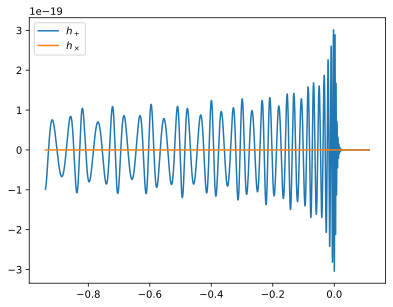

In [5]:
plt.plot(hp.sample_times,hp,label='$h_+$')
plt.plot(hc.sample_times,hc,label='$h_\\times$')
plt.legend()

# Frequency domain

In [6]:
hpf, hcf = get_fd_waveform(**par)

/work/yifanwang/ecc/env-fixspin/lib/python3.9/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: overflow encountered in func (vectorized)
  outputs = ufunc(*inputs)


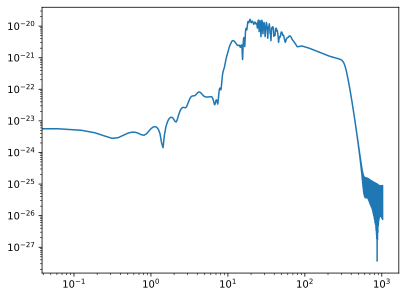

In [8]:
plt.loglog(hpf.sample_frequencies,abs(hpf),label='pycbc fd')

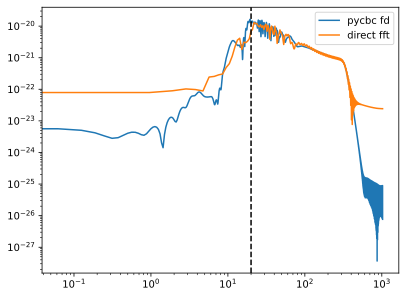

In [9]:
plt.loglog(hpf.sample_frequencies,abs(hpf),label='pycbc fd')
hp_tdtofd = hp.to_frequencyseries()
plt.loglog(hp_tdtofd.sample_frequencies,abs(hp_tdtofd),label='direct fft')
plt.axvline(20,ls='--',color='black')
plt.legend()

In [10]:
hpf.start_time

LIGOTimeGPS(0, 0)

In [11]:
hp_fdtotd = hpf.to_timeseries()

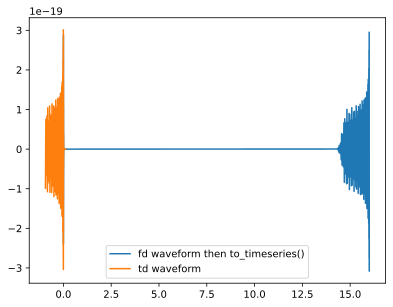

In [12]:
plt.plot(hp_fdtotd.sample_times,hp_fdtotd,label='fd waveform then to_timeseries()')
plt.plot(hp.sample_times,hp,label='td waveform')
plt.legend()

# SEOBNRv5_ROM

In [ ]:
hpf, hcf = get_fd_waveform(approximant='SEOBNRv5_ROM',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_f = 1/32)

In [ ]:
hpf.start_time

In [ ]:
hp_t = hpf.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)

# checking: SEOBNRv5 Time domain again

In [ ]:
from pycbc.waveform import utils as wfutils

In [ ]:
hp, _ = get_td_waveform(approximant='SEOBNRv5E',
                                 mass1=30,
                                 mass2=30,
                                 spin1z=0.1,
                                 f_lower=20,
                                 delta_t = 1/2048,
                                 eccentricity=0.2,rel_anomaly=0)

In [ ]:
hp.duration

In [ ]:
hp.start_time

In [ ]:
tsamples = int(1.0 / (1/16) / (1/2048) )

In [ ]:
plt.plot(hp.sample_times,hp)

# Resize

In [ ]:
hp.resize(tsamples)

In [ ]:
hp.start_time

In [ ]:
hp.duration

In [ ]:
plt.plot(hp.sample_times,hp)

# Taper

In [ ]:
hp = wfutils.td_taper(hp, hp.start_time, hp.start_time + 0.5)

In [ ]:
hp.start_time

In [ ]:
plt.plot(hp.sample_times,hp)

In [ ]:
hp_f = hp.to_frequencyseries()

In [ ]:
hp_f.start_time

In [ ]:
hp_cyc1 = hp_f.cyclic_time_shift(1)

In [ ]:
hp_cyc1.start_time

In [ ]:
hp_cyc1_td = hp_cyc1.to_timeseries()

In [ ]:
hp_cyc1_td.start_time

In [ ]:
plt.plot(hp.sample_times,hp)
plt.plot(hp_cyc1_td.sample_times,hp_cyc1_td)

In [ ]:
plt.loglog(hp.sample_frequencies,abs(hp))
plt.loglog(hp_cyc.sample_frequencies,abs(hp_cyc))

In [ ]:
plt.plot(hp.sample_frequencies,hp)
plt.plot(hp_cyc.sample_frequencies,hp_cyc)

In [ ]:
hp_t = hp.to_timeseries()
hp_cyc_t = hp_cyc.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)
plt.plot(hp_cyc_t.sample_times,hp_cyc_t)

In [ ]:
hp.start_time

In [ ]:
hp_t = hp.to_timeseries()

In [ ]:
plt.plot(hp_t.sample_times,hp_t)